In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as dt  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

C:\Users\colth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Fetch stock for use
tckr = 'OGI' 
data = pd.DataFrame()
data[tckr] = dt.DataReader(tckr, data_source='yahoo', start='2010-1-1')['Adj Close']

In [3]:
# get historical log returns
log_returns = np.log(1 + data.pct_change())

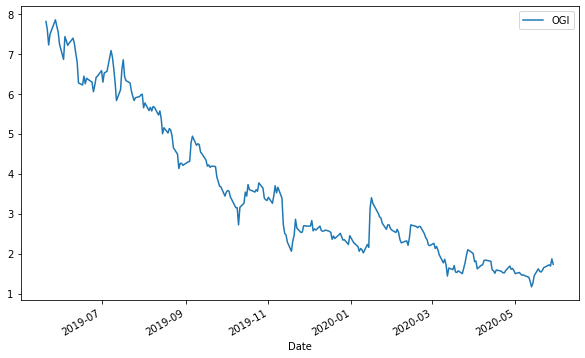

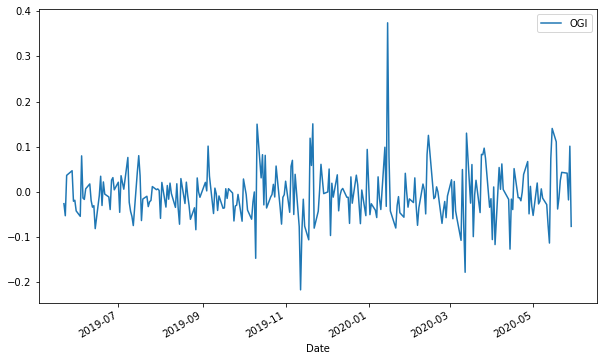

In [4]:
#plot price and log returns from the last 10 years
data.plot(figsize=(10, 6));
log_returns.plot(figsize = (10, 6))

In [5]:
# get mean and variance, and std deviation
u = log_returns.mean()
print('Mean:\n', u)

print('\n')

var = log_returns.var()
print('Variance:\n', var)

print('\n')

stdev = log_returns.std()
print('Standard Deviation:\n', stdev)

Mean:
 OGI   -0.005836
dtype: float64


Variance:
 OGI    0.003443
dtype: float64


Standard Deviation:
 OGI    0.058677
dtype: float64


In [6]:
# calculate drift component, mean - (1/2 * variance)
drift = u - (0.5 * var)
print('Drift componenet:\n', drift)

Drift componenet:
 OGI   -0.007557
dtype: float64


In [7]:
# We know have drift and stdev in the Brownian Motion eqn:
# r = drift + stdev * e^r

In [8]:
# We need to convert these both to arrays
print(type(drift))
print(type(stdev))

np.array(drift)
np.array(stdev)

drift.values
stdev.values

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


array([0.05867698])

In [9]:
# The second component of the Brownian Motion eqn is a random number x, corresponding
# to the distance between the mean and events, expressed as the number of std deviations.
# Here we have the number corresponding to a 95% confidence interval.
norm.ppf(0.95)

1.6448536269514722

In [10]:
# intervals are the number of days to be simulated, and iterations is how many simulations are run.
n_days = 21
iters = 1000

In [11]:
# This is e^r in the eqn
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(n_days, iters)))

print(daily_returns)

[[1.06496767 1.00333294 1.00379048 ... 1.00710132 0.98915025 0.86786554]
 [0.97326095 0.93455299 1.03638665 ... 0.86753834 0.88495036 1.0019827 ]
 [0.95932316 0.92233613 0.94133718 ... 1.02430918 1.07237377 0.97098419]
 ...
 [0.99701823 0.9829476  1.03569422 ... 1.01433078 1.0654201  1.06689365]
 [1.09273791 1.06100595 0.92631967 ... 0.9571397  0.96059206 0.95395184]
 [1.06031619 0.99274901 1.01067031 ... 0.94060532 0.96982373 0.92434248]]


In [12]:
# Sn = Sn-1 * DAILYRETURNn
S0 = data.iloc[-1]

price_list = np.zeros_like(daily_returns)

price_list[0] = S0

for n in range(1, n_days):
    price_list[n] = price_list[n - 1] * daily_returns[n]


In [13]:
b = S0[0];
a = b - b*.10;
c = b + b*.10;

priceList = list(price_list[n_days-1])
priceListdict = {'<a': 0, 'a<=x<b': 0, 'b<=x<c': 0,'c<=': 0}
for entry in priceList:
    if entry < a:
        priceListdict['<a'] += 1
    elif a <= entry < b:
        priceListdict['a<=x<b'] += 1
    elif b <= entry < c:
        priceListdict['b<=x<c'] += 1
    else:
        priceListdict['c<='] += 1

print(S0)
print(a, '; ', b, '; ', c)
print(priceListdict)


OGI    1.7329
Name: 2020-05-29 00:00:00, dtype: float64
1.5596100211143493 ;  1.7329000234603882 ;  1.906190025806427
{'<a': 577, 'a<=x<b': 150, 'b<=x<c': 102, 'c<=': 171}


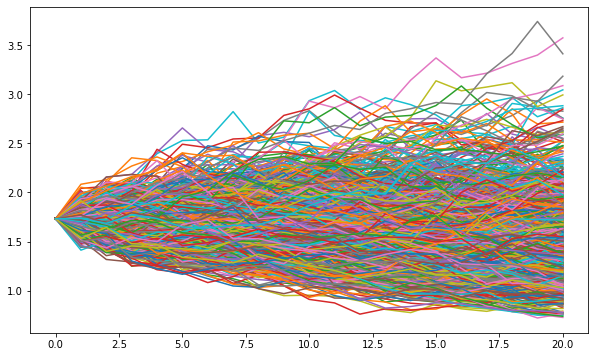

In [14]:
#Plotting our simulation
plt.figure(figsize=(10,6))
plt.plot(price_list);